# Mechanics 1 - Problem 10.11

Philipp Schlatter February 2022 based on Matlab code by Arne Nordmark

Some preliminaries

In [1]:
%matplotlib notebook 
# possible options: notebook, inline or widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.animation
from mpl_toolkits.mplot3d import Axes3D
from math import pi
from scipy.integrate import solve_ivp
params = {'legend.fontsize': 12,
          'legend.loc':'best',
          'figure.figsize': (8,5),
          'lines.markerfacecolor':'none',
          'axes.labelsize': 12,
          'axes.titlesize': 12,
          'xtick.labelsize':12,
          'ytick.labelsize':12,
          'grid.alpha':0.6}
pylab.rcParams.update(params)

Define the relevant physical arameters for the problem, together with the numerical parameters

In [7]:
class parcl:
    """empty class"""

# Physical parameters    
par = parcl()
par.g = 9.82
par.m=1
par.mu=0
par.alpha0=pi/6*0+0.1
par.R=1
par.v0=2.5

# Simulation parameters
Time=50
dt=0.05

Ordinary differential equation 
$$\dot{q} = f(q)$$

In [8]:
def bead_sys(t,q,par,gg): 
    
    # unpack state variables
    r,th,rt,tht = q
    
    # normal force/m
    n=par.g*np.sin(par.alpha0)+r*tht**2*np.cos(par.alpha0)
    # speed
    v=np.sqrt((rt/np.sin(par.alpha0))**2+(r*tht)**2)
    
    rtt=r*tht**2-np.cos(par.alpha0)*n-par.mu*rt/v*n
    thtt=-2*rt*tht/r-par.mu*tht/v/n
    
    # compose right-hand side
    qt = [rt,tht,rtt,thtt]
    return qt

Integrate the system in time to get $q(t)$, using standard ODE solver, based on initial condition $q_0$

In [9]:
q0=[par.R,0,0,par.v0/par.R]
sol=solve_ivp(bead_sys,[0,Time],q0,args=(par,0),dense_output=True)
t = np.arange(0, Time+1e-10, dt)
q = sol.sol(t)

#sol=solve_ivp(bead_sys,[0,Time],q0,args=(par,0),dense_output=False)
#q=sol.y
#t=sol.t

Extract relevant quantities from the state vector $q$, including the Cartesian coordinates, energies $T$ and $V$ and angular momentum $H_z$.

In [11]:
# state variables
r=q[0,:]
th=q[1,:]
rt=q[2,:]
tht=q[3,:]

# Cartesian coordinates
x=r*np.cos(th)
y=r*np.sin(th)
z=r*np.cos(par.alpha0)/np.sin(par.alpha0)

# energies
T = par.m*( (rt/np.sin(par.alpha0))**2 + (r*tht)**2)/2
V=par.m*par.g*z

# angular momentum
Hz = par.m*r**2*tht

# normal force
N=par.m*(par.g*np.sin(par.alpha0)+r*tht**2*np.cos(par.alpha0))

Plot integral quantities

<IPython.core.display.Javascript object>


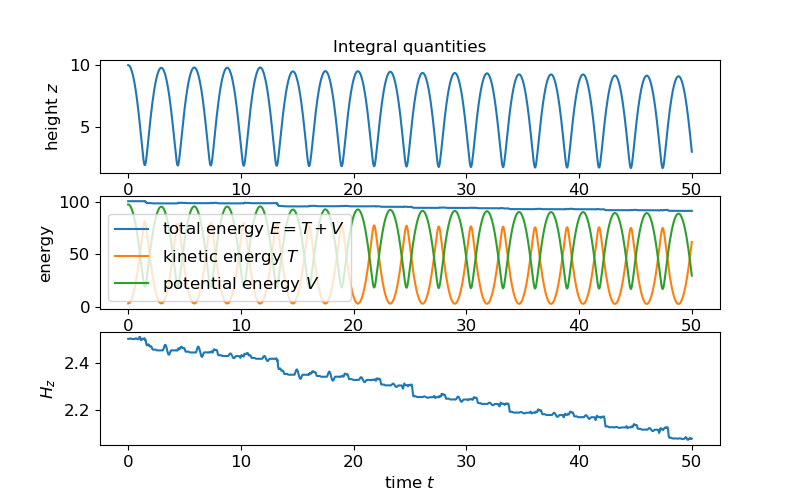

In [12]:
fig = plt.figure()
ax = fig.add_subplot(311)
ax.set_title('Integral quantities')
ax.plot(t,z)
ax.set_ylabel('height $z$')
ax = fig.add_subplot(312)
ax.plot(t,T+V,label='total energy $E=T+V$')
ax.plot(t,T,label='kinetic energy $T$')
ax.plot(t,V,label='potential energy $V$')
ax.set_ylabel('energy')
ax.legend()
ax = fig.add_subplot(313)
ax.plot(t,Hz)
ax.set_xlabel('time $t$')
ax.set_ylabel(f'$H_z$')
plt.show()

Create a three-dimensional view of the cone with two projections, animate and write video file

<IPython.core.display.Javascript object>


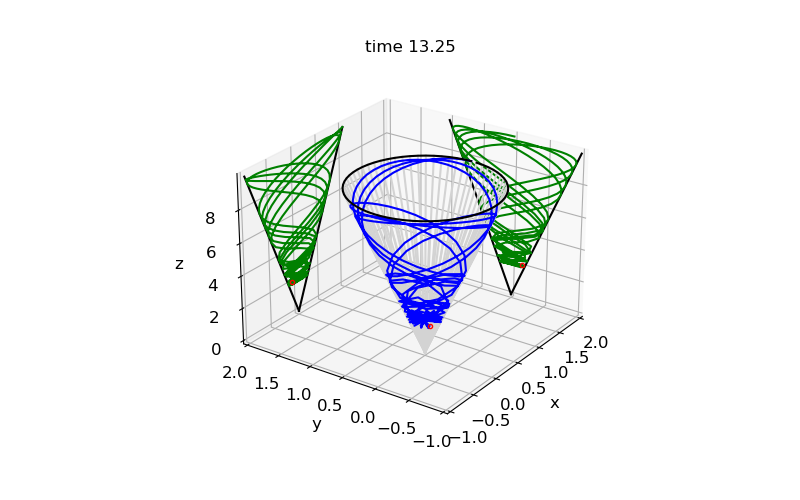

In [13]:
H=par.R/np.tan(par.alpha0);
ym = 2*par.R
phi=np.arange(0,2*pi,0.1)

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')

def animate(j):
    ax.cla()
    
    ax.plot([0,par.R],[ym,ym],[0,H],'k')
    ax.plot([0,-par.R],[ym,ym],[0,H],'k')
    ax.plot([ym,ym],[0,par.R],[0,H],'k')
    ax.plot([ym,ym],[0,-par.R],[0,H],'k')
    
    ax.plot(x[0:j+1],ym+x[0:j+1]*0,z[0:j+1],'g')
    ax.plot(ym+x[0:j+1]*0,y[0:j+1],z[0:j+1],'g')
    ax.plot(x[j],ym+x[j]*0,z[j],'r.')
    ax.plot(ym+x[j]*0,y[j],z[j],'r.')
    
    for i in range(phi.size):
        ax.plot([0,np.cos(phi[i])],[0,np.sin(phi[i])],[0,H],color='lightgrey')

    ax.plot(x[0:j+1],y[0:j+1],z[0:j+1],'b-')
    ax.plot(x[j],y[j],z[j],'r.')

    ax.plot(np.cos(phi),np.sin(phi),phi*0+H,'k')
   
    ax.set_xlim3d(-par.R, ym)
    ax.set_ylim3d(-par.R, ym)
    ax.set_zlim3d(0, H)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(elev=25, azim=-145)
    
    ax.set_title(f"time {t[j]:.2f}")  

ani=matplotlib.animation.FuncAnimation(fig, animate, frames=t.size, repeat=False,interval=1)


In [8]:
writer = matplotlib.animation.writers['ffmpeg']
writer = writer(fps=24)
ani.save('out.mp4', writer=writer, dpi=200)